# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Amin Robatian
2.   Student Number: 400301075


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

x_train = dataset.X[:int(0.8 * len(dataset))]
y_train = dataset.Y[:int(0.8 * len(dataset))]

x_test = dataset.X[int(0.8 * len(dataset)):]
y_test = dataset.Y[int(0.8 * len(dataset)):]

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.


x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

A = np.zeros((len(x_train), 2))
A[:,0] = x_train
A[:,1] = np.ones(len(x_train))
ATA = np.matmul(A.T,A) 
m = np.matmul(np.matmul(np.linalg.inv(ATA), A.T), y_train.reshape((len(x_train), 1))) 

In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train, predicted_train_y)
test_error = mean_squared_error(y_test, predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.32467763017774226
MSE test error: 0.3544951192130029


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

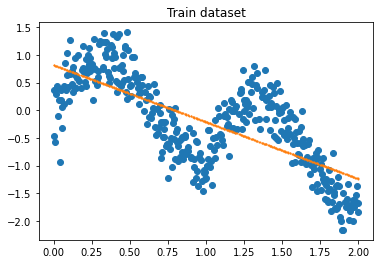

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0] * x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

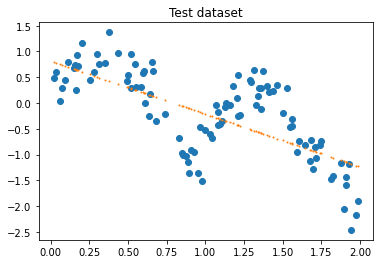

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0] * x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

==> The obtained accuracy is not acceptable because, as can be seen in the curves, the data follows a more complicated relationship than the line, and matching it with the line is far from reality. It seems that the piecewise linear function is more suitable for its modeling.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

==> Considering that our data does not follow a linear relationship, Locally Weighted Linear Regression method will work better than linear regression, because it ignores the effects of distant points around the query point, and it is expected to give better results.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-1 * np.dot((xi - the_query_point), (xi - the_query_point).T) / (2 * hyperparameter ** 2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [8]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.zeros((l, 2))
    X[:,0] = train_X
    X[:,1] = np.ones(l)
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    XTWX = np.matmul(X.T, np.matmul(W, X))
    XTWY = np.matmul(X.T, np.matmul(W, train_Y.reshape(l,1)))

    theta = np.matmul(np.linalg.inv(XTWX), XTWY)

    return (np.dot(qx, theta)).item()

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [9]:
hyperparameter = 0.1
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
error = mean_squared_error(y_test, np.array(predicted_test))
print(f"MSE test error: {error}")

MSE test error: 0.10590729682859745


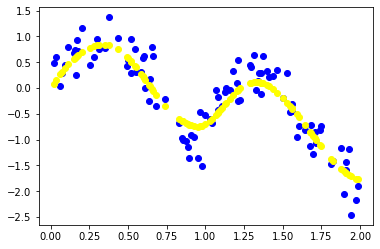

In [10]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

==> By comparing the error value as well as the graphs of these two methods, it can be seen that the second method has a much better performance on our data.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

==> It depends on the hyperparameter K, if it is not chosen too large, it can give us good results, and if a large value is chosen for it, the performance of this method will drop, because the points in the neighborhood of the query point have great variance.

### Part10:
Implementing the `KNN model`.

In [11]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        # implement the distance function
        distance = np.absolute(x1 - x2) 
        return distance

    def return_nn_ids(self, x):
        # find indices of k nearest neighbours to x
        indices = np.array([self.distance(x, x2) for x2 in self.X]).argsort()[:self.k]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = self.Y[neareest_indices].mean()
        return predicted_y

In [12]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test, predicted_y)
    return error, predicted_y

In [13]:
k = 30
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09717571174237101


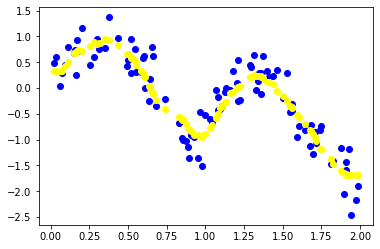

In [14]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

==> By comparing the accuracy obtained in this section with the previous sections as well as the curves, it can be seen that this algorithm gives us a higher accuracy, because for each query point, it considers only the effects of a limited number of neighboring points.